Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

1 - Crosstab Analysis:

 - Create a crosstab between the product category and the isBestSeller status.

 - Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

2 - Statistical Tests:

 - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
 - Compute Cramér's V to understand the strength of association between best-seller status and category.
Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [54]:
# Importer les bibliothéque 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [55]:
#Display DF 
url = "/Users/redarerizani/Desktop/ironhack/Week 4 - EDA and Inferential Stats/LABS/amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(url)
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [56]:
df.shape

(2443651, 9)

In [57]:
# 1 - Create a crosstab between the product category and the isBestSeller status.

crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [58]:
# Are there categories where being a best-seller is more prevalent?
crosstab_result_sorted = crosstab_result.sort_values(by=True, ascending=False).head(10)
crosstab_result_sorted

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
Beauty,19010,302
Pet Supplies,9152,285
Arts & Crafts,9319,230
Women,17559,213


In [59]:
# 2 - Statistical Tests:
# - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _,_ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

le p- value equal to zero  it's mean there is a strong relationship 

In [60]:
# Compute Cramér's V to understand the strength of association between best-seller status and category.
# Visualizations:

from scipy.stats.contingency import association

cramer =  association(crosstab_result, method="cramer")
print (cramer)

0.1222829439760564


le cramer's  tend vers zero : there is not strength of association between best-seller and category 

<Axes: xlabel='category'>

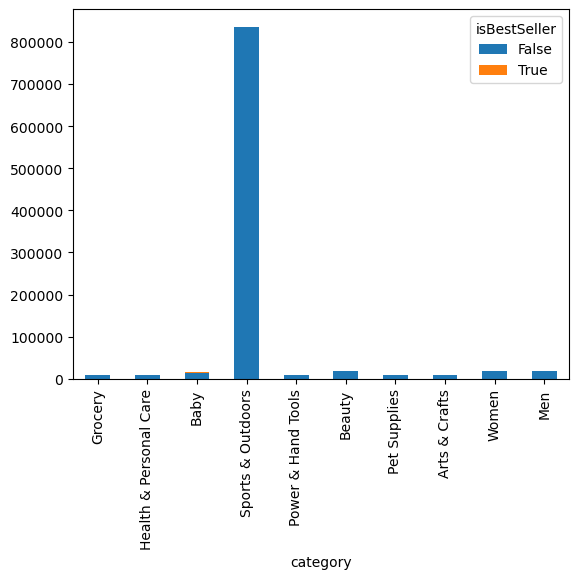

In [61]:
# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
crosstab_result_sorted.plot(kind="bar", stacked=True)

Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

1. Preliminary Step: Remove outliers in product prices.

 _ For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

 Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

2. Violin Plots:

  _ Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.
Bar Charts:

  _ Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.
Box Plots:

3. Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


In [62]:
# 1. Preliminary Step: Remove outliers in product prices.
#For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 
#1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset
#The next steps will be done with the dataframe without outliers.



# Calcul du premier et du troisième quartile
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calcul de l'IQR
IQR = Q3 - Q1

# Définition des bornes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrage des données pour conserver seulement les valeurs dans [lower_bound, upper_bound]
outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


In [63]:
#2 Use a violin plot to visualize the distribution of price across different product categories.
# Filter out the top 20 categories based on count for better visualization.

top_20_categories = outliers['category'].value_counts().nlargest(20).index
filtered_data = outliers[outliers['category'].isin(top_20_categories)]



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Handmade Home & Kitchen Products'),
  Text(1, 0, 'Sports & Outdoors'),
  Text(2, 0, 'Handmade Gifts'),
  Text(3, 0, 'Fragrances'),
  Text(4, 0, 'Skin Care'),
  Text(5, 0, 'Birthday Gifts'),
  Text(6, 0, 'Handmade Kitchen & Dining'),
  Text(7, 0, 'Bath & Body'),
  Text(8, 0, 'Manicure & Pedicure Products'),
  Text(9, 0, 'Beauty'),
  Text(10, 0, 'Handmade Artwork'),
  Text(11, 0, 'Make-up'),
  Text(12, 0, 'Baby'),
  Text(13, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(14, 0, 'Handmade Home Décor'),
  Text(15, 0, 'Men'),
  Text(16, 0, 'Luggage and travel gear'),
  Text(17, 0, 'Handmade Jewellery'),
  Text(18, 0, 'Women'),
  Text(19, 0, 'Hair Care')])

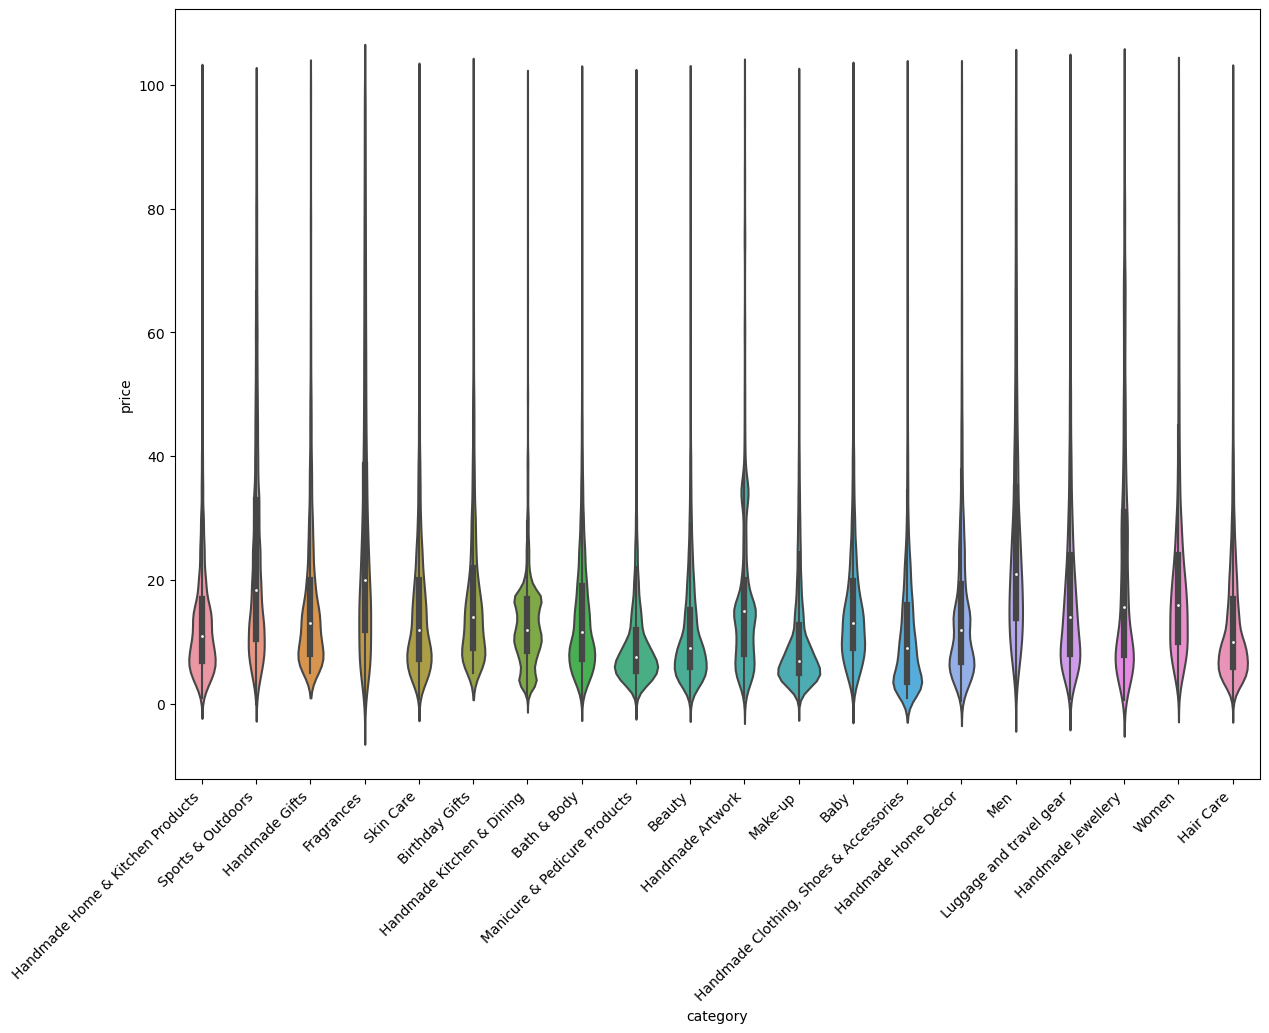

In [64]:
plt.figure(figsize=(14, 10))
sns.violinplot(x='category', y='price', data=filtered_data)
plt.xticks(rotation=45, ha='right')

In [65]:
#Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

In [73]:
# Calculate average price for each category
average_price_by_category = outliers.groupby('category')['price'].mean()

# Select top 10 categories based on product count
top_10_categories = outliers['category'].value_counts().nlargest(10).index

filtered_avg_price_category = average_price_by_category.loc[top_10_categories].sort_values(ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Birthday Gifts'),
  Text(2, 0, 'Handmade Gifts'),
  Text(3, 0, 'Skin Care'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Hair Care'),
  Text(6, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(7, 0, 'Beauty'),
  Text(8, 0, 'Make-up'),
  Text(9, 0, 'Manicure & Pedicure Products')])

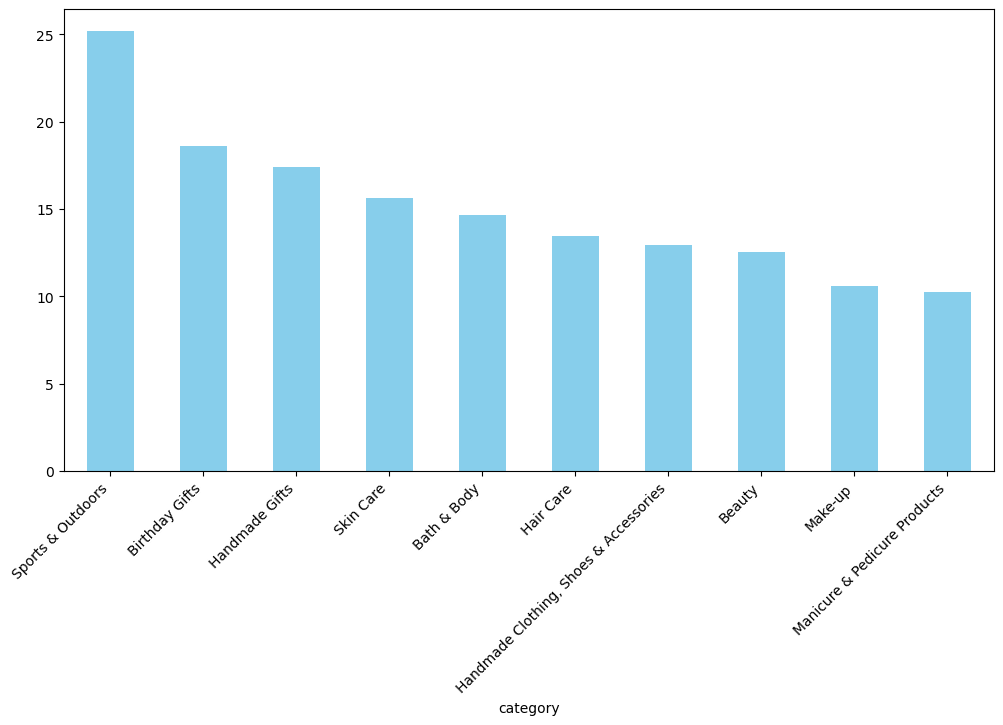

In [74]:
plt.figure(figsize=(12, 6))
filtered_avg_price_category.plot.bar(top_10_categories, average_price_by_category, color='skyblue') 
plt.xticks(rotation=45, ha='right')

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [77]:
top_10_categories = outliers['category'].value_counts().nlargest(10).index
filtered_data = outliers[outliers['category'].isin(top_10_categories)]    



Text(0.5, 1.0, 'box plots of product rating')

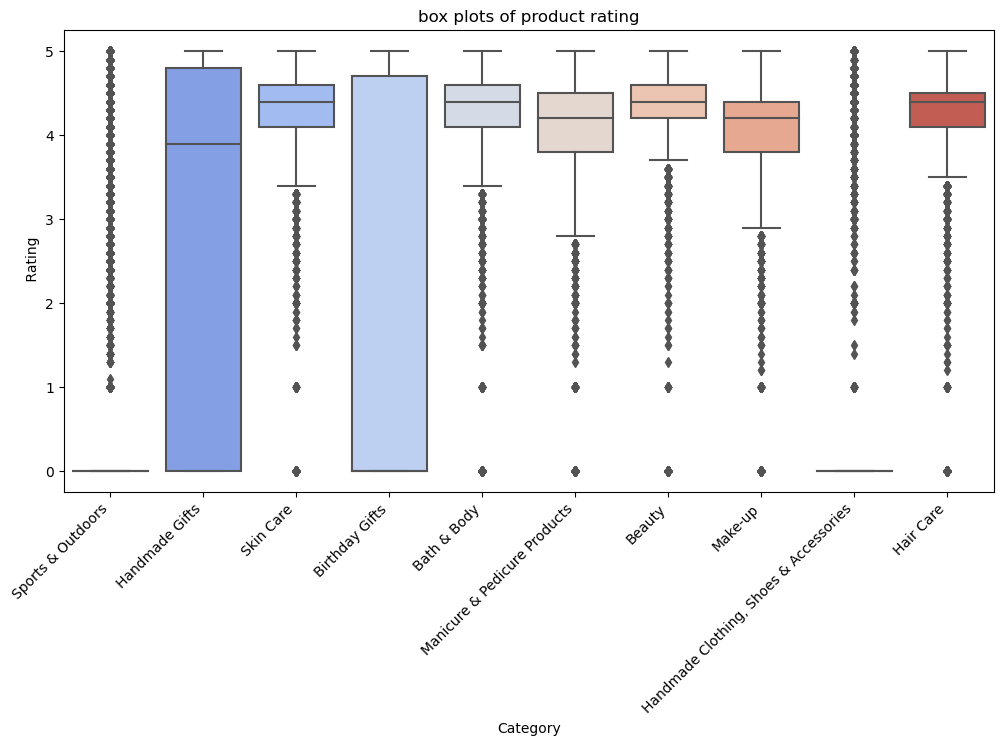

In [80]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='category', y='stars', palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.ylabel(' Rating')
plt.xlabel('Category')


Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [89]:
# Calculate median price for each category
median_price_by_category = outliers.groupby('category')['stars'].median()
median_price_by_category.sort_values(ascending=False).head(1)

category
Computer Memory    4.7
Name: stars, dtype: float64

## Part 3: Investigating the Interplay Between Product Prices and Number of Reviews

**Objective**: Analyze how product number of reviews correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `reviews`.
    - Is there a significant correlation between product price and its number of reviews?

In [ ]:
# Calculating the Pearson correlation coefficient between 'price' and 'reviews' columns
correlatio_pearson = df['price'].corr(df['stars'])

# Calculating the Spearman rank correlation between 'price' and 'reviews' 
correlation_spearman = df['price'].corr(df['stars'], method='spearman')

correlatio_pearson , correlation_spearman

(-0.12490673262148386, -0.13316425462433876)


 value close to 1 implies a strong positive correlation.
 value close to -1 implies a strong negative correlation.
 value close to 0 implies little to no linear/monotonic correlation.


there is no corelation between price and number of reviews  there are independants ,  we can see a slight negative tendance 

<Axes: xlabel='reviews', ylabel='price'>

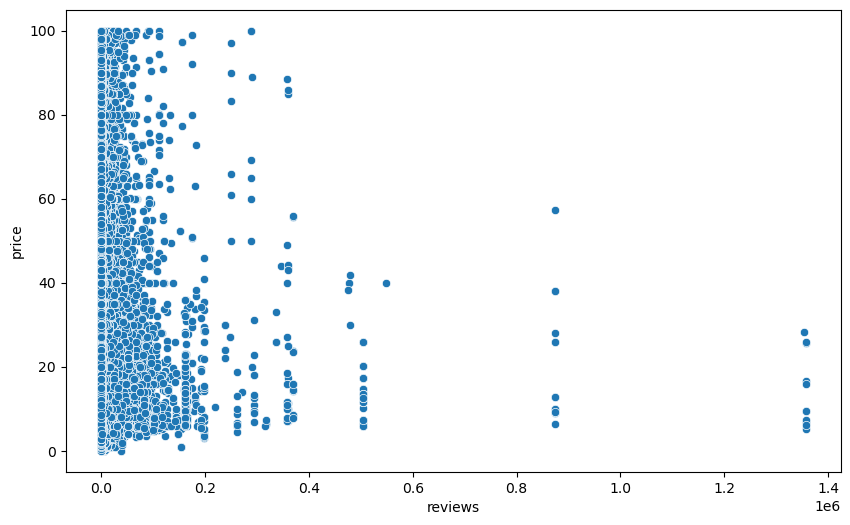

In [ ]:
# Plotting a scatter plot to visualize the relationship between 'stars' and 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=outliers, x='reviews', y='price')

There doesn't seem to be a strong trend indicating that products with higher prices receive more or fewer reviews. The data points are dispersed without a clear pattern.

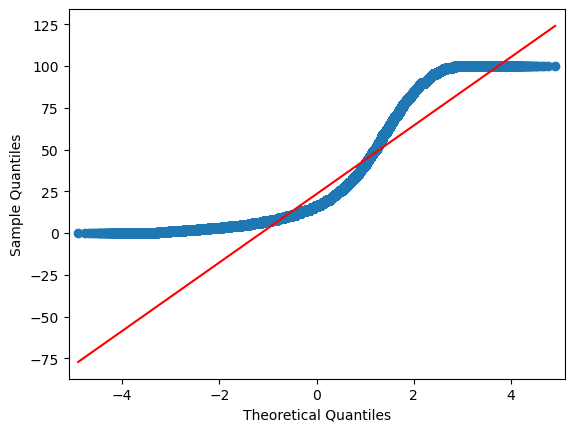

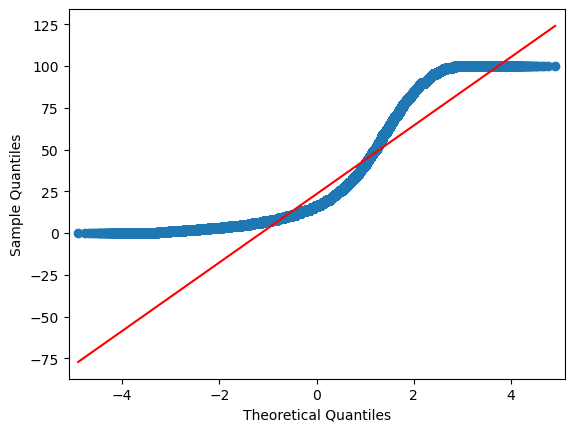

In [ ]:
sm.qqplot(outliers['price'], line='s')

QQ plot indique that the price is not a normal distribution 